# Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy.io import arff
from IPython.display import HTML, display
import re
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV

# DataSet import

Looking at the columns names that we stored in a txt file

In [2]:
colonne = list()
with open('map_coluns2.txt') as f:
    lines = f.readlines()
    colonne = lines
colonne = [re.sub("\d{1,3}. ","",x) for x in colonne]
colonne = [re.sub("\n","",x) for x in colonne]
colonne

['ID',
 'Age',
 'Gender',
 'Education',
 'Country',
 'Ethnicity',
 'Nscore',
 'Escore',
 'Oscore',
 'Ascore',
 'Cscore',
 'Impulsive',
 'SS',
 'Alcohol',
 'Amphet',
 'Amyl',
 'Benzos',
 'Caff',
 'Cannabis',
 'Choc',
 'Coke',
 'Crack',
 'Ecstasy',
 'Heroin',
 'Ketamine',
 'Legalh',
 'LSD',
 'Meth',
 'Mushrooms',
 'Nicotine',
 'Semer',
 'VSA']

In [3]:
# Reading the CSV file

df = pd.read_csv("drug_consumption.data", sep = ",", names = colonne)
df = df.drop(["ID","Country"], axis = 1)
df

,Age,Gender,Education,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,0.49788,0.48246,-0.05921,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,-0.07854,-0.48246,1.98437,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,0.49788,-0.48246,-0.05921,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,-0.95197,0.48246,1.16365,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,0.49788,0.48246,1.98437,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,0.48246,-0.61113,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,-0.95197,-0.48246,-0.61113,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,-0.07854,0.48246,0.45468,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,-0.95197,0.48246,-0.61113,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [4]:
#printing in HTML
#display(HTML(df.to_html()))

In [5]:
#Dataset shape
df.shape

(1885, 30)

In [6]:
#Values type
df.dtypes.value_counts()

object     19
float64    11
dtype: int64

## Analyse des Nan

<AxesSubplot:>

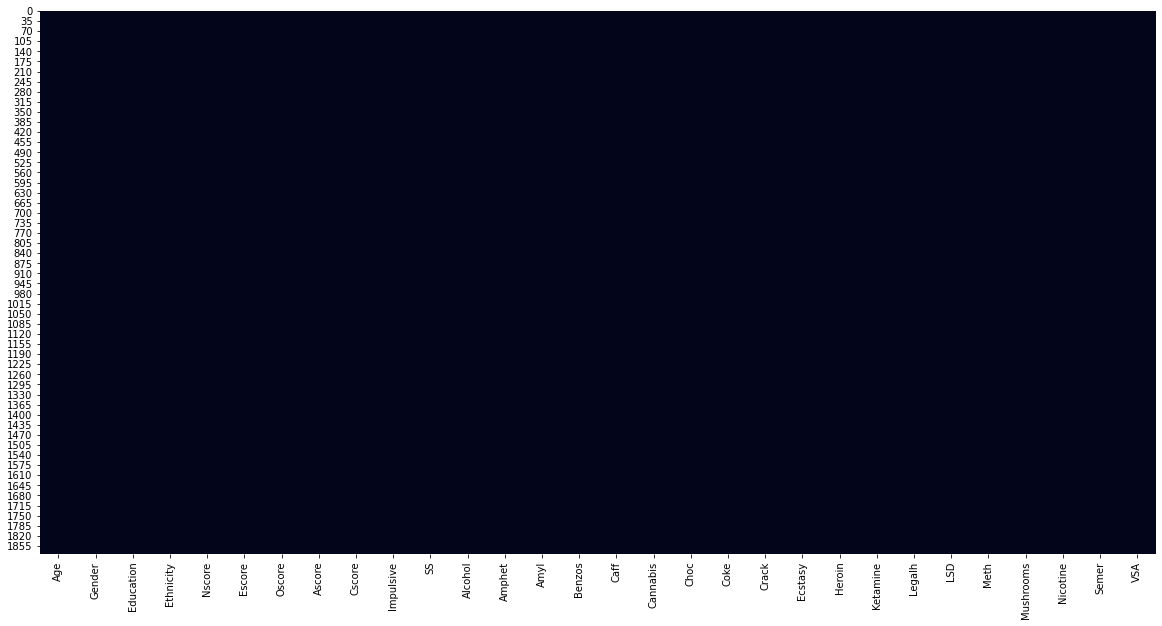

In [7]:
# Heatmap of nan per variable
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar = False)

aucun Nan

# Target Analysis

Le lien du dataset nous montre que l'on peut consiféder CL0 ("never used") et CL1 ("used a decade ago") as non user people and the other "CLX" as user people

In [8]:
df.replace("CL0", 0, inplace = True)
df.replace("CL1", 0, inplace = True)
df.replace("CL2", 1, inplace = True)
df.replace("CL3", 1, inplace = True)
df.replace("CL4", 1, inplace = True)
df.replace("CL5", 1, inplace = True)
df.replace("CL6", 1, inplace = True)

# Clustering levels of dependency

As the dataset doesn't point a specific target, we want to see if a clusterisation is possible

In [9]:
# loop for k-means with elbow methods
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(df)
    print (i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)

C:\Users\thoma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


1 21987.508508095423
2 18016.6537737293
3 16575.72161422694
4 15716.736264551464
5 15087.709015766253
6 14641.146794759152
7 14250.897231556586
8 13911.035026697156
9 13618.438924687654
10 13374.023579915418


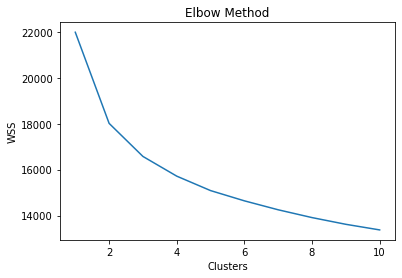

In [10]:
# Loop plot
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WSS')
plt.show()

According to the elbow method the ideal clustering offers 3 clusters

In [11]:
#k-means with k = 3
kmeans = KMeans(n_clusters = 3, init = 'k-means++',random_state = 0)
estimator = kmeans.fit(df)
estimator

KMeans(n_clusters=3, random_state=0)

In [12]:
class_predict = estimator.predict(df)
class_predict

array([0, 2, 0, ..., 1, 1, 2])

In [13]:
# Addition of a class target probably linked to the addiction
df["Addiction"] = class_predict
df

,Age,Gender,Education,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,...,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA,Addiction
0,0.49788,0.48246,-0.05921,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,...,0,0,0,0,0,0,1,0,0,0
1,-0.07854,-0.48246,1.98437,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,...,0,1,0,1,1,0,1,0,0,2
2,0.49788,-0.48246,-0.05921,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,...,0,0,0,0,0,0,0,0,0,0
3,-0.95197,0.48246,1.16365,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,...,0,1,0,0,0,0,1,0,0,0
4,0.49788,0.48246,1.98437,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,0.48246,-0.61113,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,...,0,0,1,1,0,0,0,0,1,2
1881,-0.95197,-0.48246,-0.61113,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,...,0,0,1,1,1,1,1,0,0,2
1882,-0.07854,0.48246,0.45468,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,...,0,1,0,1,0,1,1,0,0,1
1883,-0.95197,0.48246,-0.61113,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,...,0,0,1,1,0,1,1,0,0,1


In [14]:
# looking at the target balance 
df["Addiction"].value_counts()

0    846
1    524
2    515
Name: Addiction, dtype: int64

In [15]:
# Writing datasert to csv
df.to_csv("../2.Analyse_Exploratoire/data_preproc.csv", index = False)

# Conclusion

- The dataset was clean.
- The output of our clustering, reveal 3 classes which we cannot determine now what is correspond. That is why a exploratory analysis is necessary